# Analysis of Experiments with integer number.m

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from TestFunctions import GetBestPlacesFigure, GetSimpleStatistics, PlotStepsVsEpisodes,PlotMultipleExperiments,totaltime

In [3]:
experiements = pd.read_csv('Final.csv')
#experiements[experiements['ID'] in [7,8]]
#experiements.query('ID in []')
#experiements.query('ID in [3,43,15,48]')
#experiements.query('ID in [3,7,13,15,27,31,43,48,51,52,56]')
#experiements.tau.unique()
#experiements.query('ID in [7]')
experiements.query('ID in [72,75,76,77]')

,ID,layers,tau,optimizer,advantage,max_timesteps,gym_record,activation,batch_size,episodes,exploration,gamma,hidden_size,train_repeat,display,min_train,batch_norm,Rewardscheme,Details
66,72,1,0.01,adam,avg,1000,None,relu,10,1000,0.1,0.99,100,10,True,10,False,"[-1.0, 1.0, -0.1]",Vision 90
69,75,1,0.01,adam,avg,1000,None,relu,10,200,0.1,0.99,100,10,True,10,False,"[-10.0, 1000.0, -10.0]",NaN
70,76,1,0.01,adam,avg,1000,None,relu,10,200,0.1,0.99,100,10,True,10,False,"[-10.0, 1000.0, -100.0]",NaN
71,77,1,0.01,adam,avg,1000,None,relu,10,200,0.1,0.99,100,10,True,10,False,"[-10.0, 1000.0, -1000.0]",NaN


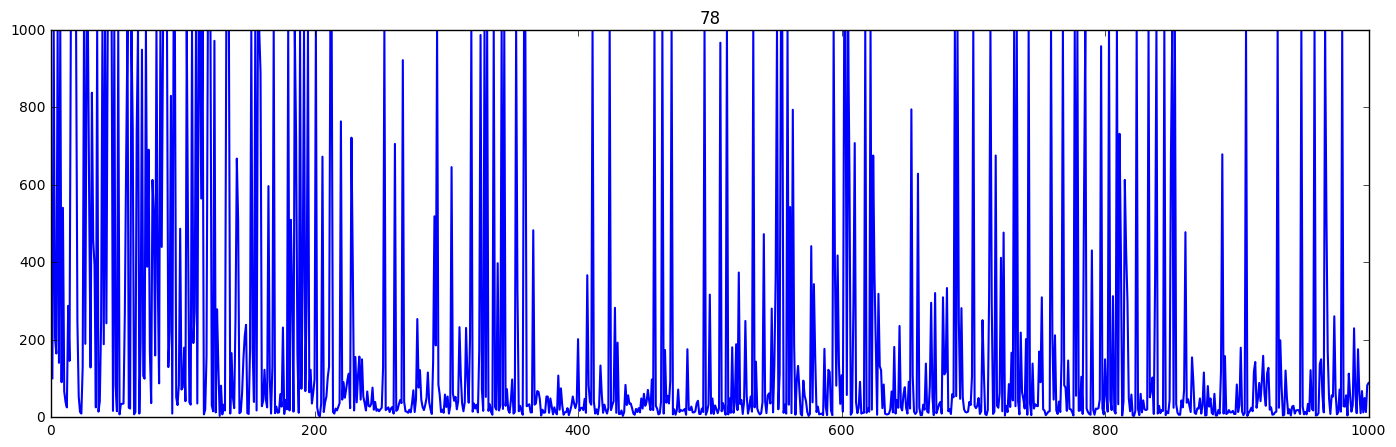

In [6]:
plt.figure(figsize=(17,5))
PlotStepsVsEpisodes(78,None,WithRandomWalk=False,withaxis=False,standalone=True)

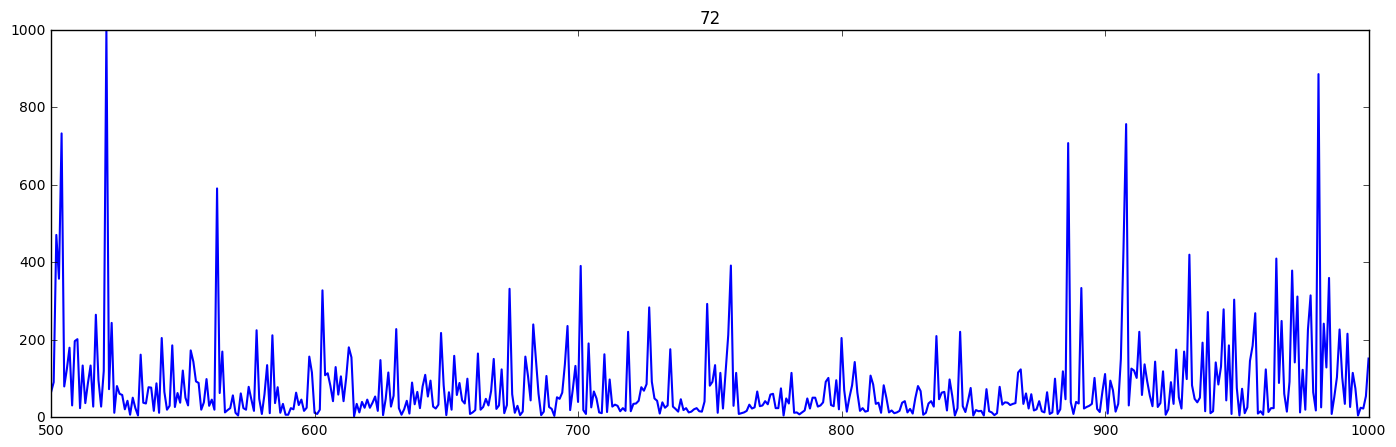

In [6]:
plt.figure(figsize=(17,5))
PlotStepsVsEpisodes(72,None,WithRandomWalk=False,withaxis=False,standalone=True,xlim=(500,1000))

<module 'matplotlib.pyplot' from '/home/aqeel/anaconda2/envs/py3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

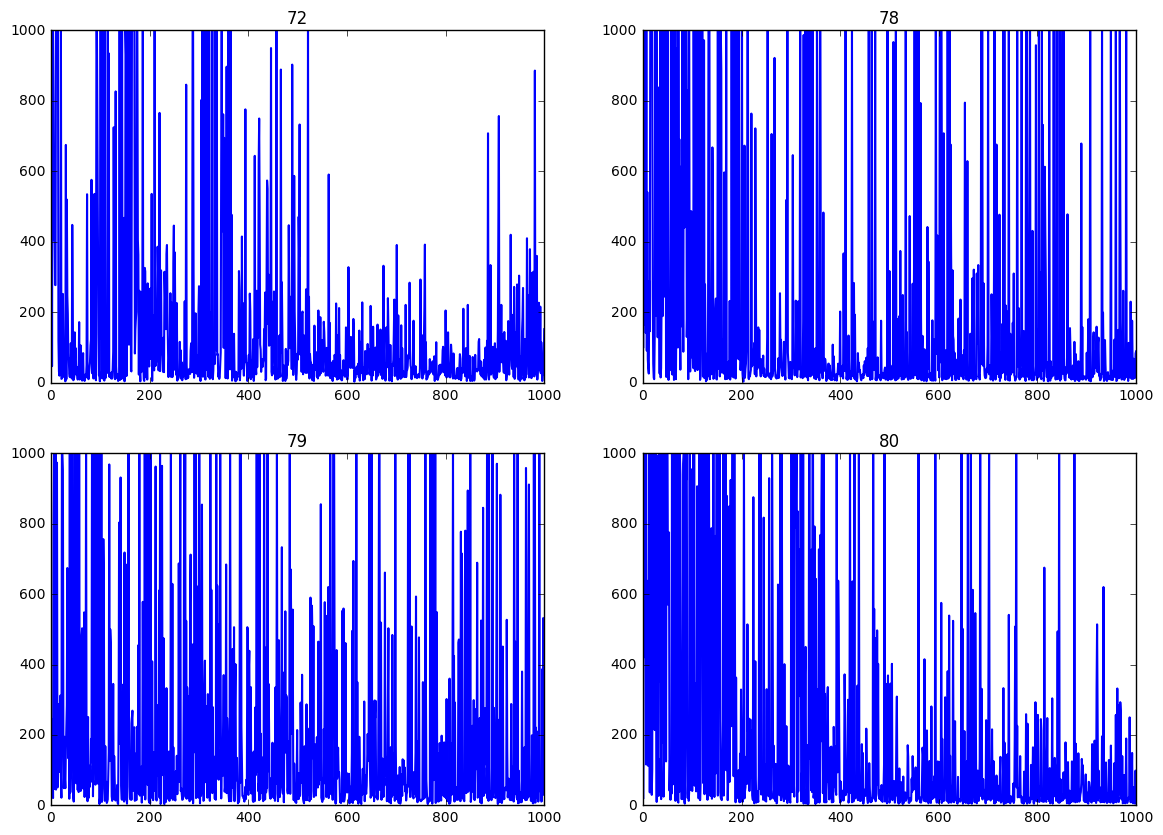

In [5]:
PlotMultipleExperiments([72,78,79,80],Plts_onX=2,WithRandomWalk=False)

### Total Time For Experiment

In [ ]:
output = totaltime([58,62,63,65])
for o in output:
    print o,output[o]

# Simple Statistics

In [5]:
GetSimpleStatistics('72')

,Episode,Steps,Reward,Time,RWsteps,RWPD,AIPD
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,154.096000,-14.461600,275.170038,381.286000,0.001407,0.001583
median,500.500000,51.000000,-4.100000,114.984662,284.500000,0.001151,0.001331
std,288.819436,250.660331,25.242059,426.032671,308.162711,0.001227,0.001414
min,1.000000,3.000000,-100.000000,2.048530,5.000000,0.000077,0.000000
25%,250.750000,23.000000,-13.225000,44.941726,127.750000,0.000604,0.000459
50%,500.500000,51.000000,-4.100000,114.984662,284.500000,0.001151,0.001331
75%,750.250000,142.250000,-1.300000,308.449526,577.500000,0.001687,0.002173
max,1000.000000,1000.000000,0.700000,2906.498168,1001.000000,0.008254,0.008132


# Experiment Best Places analysis

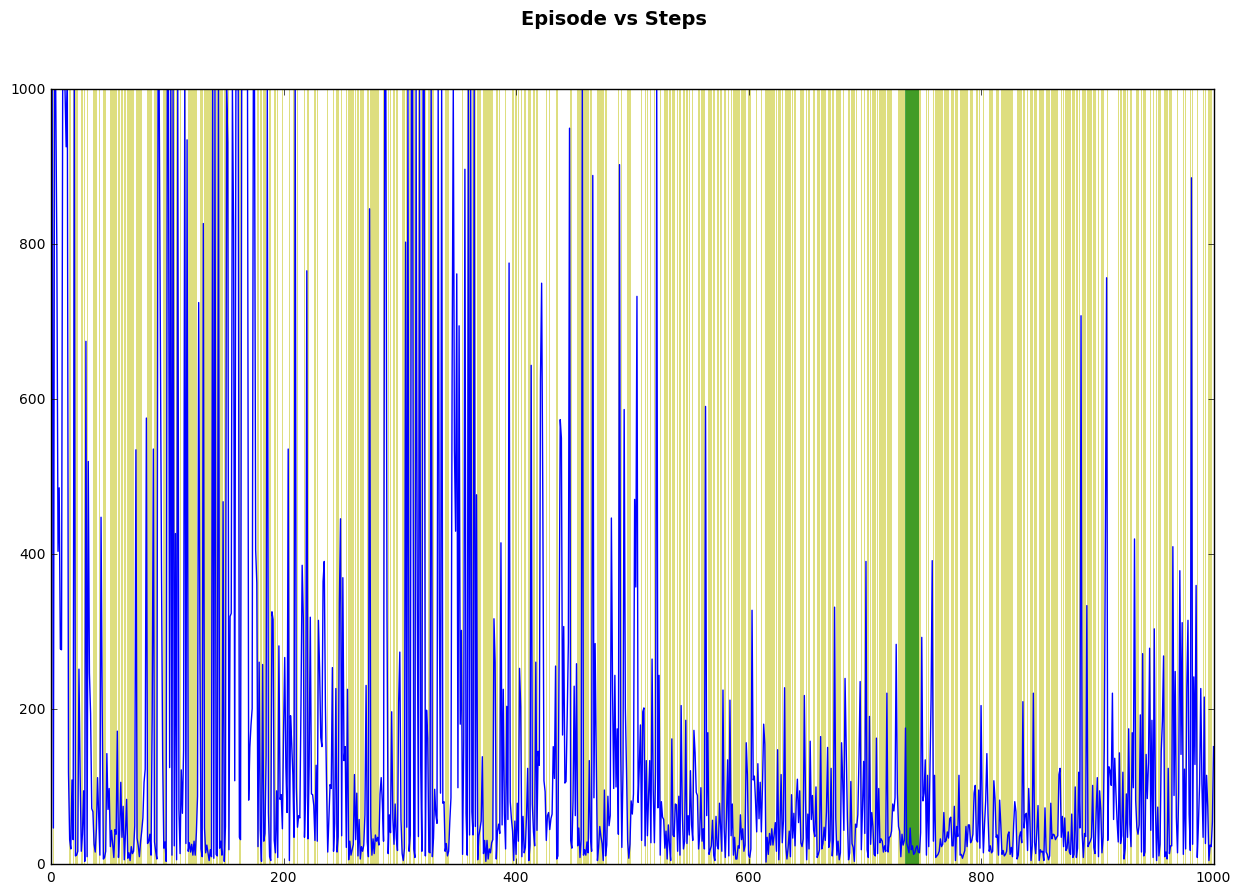

In [2]:
GetBestPlacesFigure('72',50)

# Time Consumption

In [ ]:
df.plot.line('Episode','Time',figsize=(15,10),)
plt.axvspan(200,281,color='r',alpha=0.5,lw=0)

In [ ]:
df[df.columns[[5,6]]].plot(figsize=(15,10),title='Time vs Reward (Normalized)',logy=True,lw=2.0)

In [19]:
totaltime([72,78,79,80])

{'72': 275170.03843425633,
 '78': 451999.02805184701,
 '79': 509503.53600891586,
 '80': 463078.48766594368}